# Reading data from MyNetDiary (exported xls file)

In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt

In [2]:
#df = pd.read_excel('myNetDiary_Year_2019.xls');
#df.tail()

#for some reason, I could not read entire file in one go.  I broke the excel file myself
#df_1 = pd.read_excel('myNetDiary_Year_2019_pre0601.xls');
#print(df_1.tail())

#df_2 = pd.read_excel('myNetDiary_Year_2019_after0601.xls');
#df_2.tail()

#adding newest ewek spearately (diet change 6/29)
#df = df_1.append(df_2, ignore_index = True)

#read in main sheet
df = pd.read_excel('MyNetDiary_Year_2019_190726.xls')
df.tail()

,Food ID,Date & Time,Meal,Name,Amount,"Calories, cals","Food Score / Grade,","Total Fat, g","Saturated Fat, g","Trans Fat, g",...,"Manganese, mg","Water, g","Starch, g","Sucrose, g","Glucose, g","Fructose, g","Lactose, g","Maltose, g","Carotene Beta, mcg","Carotene Alpha, mcg"
1094,20045,2019-07-26 11:23:00,Lunch,Rice white,3.4oz,125.304401,0.327600,0.269886,0.074219,NaN,...,0.454951,65.967950,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
1095,5064,2019-07-26 15:58:00,Snack,Chicken breast,3.2oz,149.684704,3.129946,3.238633,0.916252,NaN,...,0.015422,59.202570,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0
1096,11136,2019-07-26 15:58:00,Snack,Cauliflower,4oz,26.081541,3.363330,0.510291,0.079379,NaN,...,0.149685,105.460142,NaN,NaN,NaN,NaN,NaN,NaN,7.937860,0.0
1097,11091,2019-07-26 15:58:00,Snack,Broccoli,2oz,19.844650,2.748678,0.232466,0.044792,NaN,...,0.109996,50.603859,0.0,0.045359,0.277825,0.419573,0.0,0.0,526.733722,0.0
1098,4053,2019-07-26 15:59:00,Snack,Olive oil,tbsp,119.340000,-0.812379,13.500000,1.864080,NaN,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0


In [3]:
#read in sheet with other measurements, like weight
dfMeasurements = pd.read_excel('MyNetDiary_Year_2019_190726.xls', sheet_name='Measurements')
dfMeasurements.head()

,Date,Measurement,Value,Unit
0,2019-01-03,Body Weight,162.000079,lbs
1,2019-01-03,Basal Metabolic Rate (BMR),1381.944946,cals
2,2019-01-03,Body Mass Index (BMI),25.396412,NaN
3,2019-01-03,Daily Steps Count,5423.000000,NaN
4,2019-01-04,Body Weight,161.601043,lbs


In [4]:
# modified for new diet check (new begins 6/29)
#start_date = '2019-05-08'
#start_date = '2019-06-29'
start_date = '2019-05-08'

myColumnList = ['Date', 'Total Carbs, g', 'Fiber, g', 'Net Carbs, g', 'Protein, g', 'Total Fat, g', 'Calories, cals']
#dataByDay = pd.DataFrame(columns=['Date', 'Carbs, g'])
dataByDay = pd.DataFrame(columns = myColumnList)

# check first week of new diet
#for day in range(55):
for day in range(80):
    current_date = pd.to_datetime(start_date) + pd.DateOffset(days=day)
    #print(current_date)
    current_date_plusOne = current_date + pd.DateOffset(days=1)
    #print(current_date_plusOne)

    mask = (df['Date & Time'] > current_date) & (df['Date & Time'] <= current_date_plusOne)

    dfDay = df.loc[mask]
    #print(dfDay)
    
    #get same date range for weights
    #mask = (dfMeasurements['Date'] > current_date) & (dfMeasurements['Date'] <= current_date_plusOne)

    #dfWeight = dfMeasurements.loc[mask]
    #print(dfWeight)
    
    #Check for days with incomplete logs.  Right now, I'm eating three meals every day
    hadBreakfast = 'Breakfast' in dfDay['Meal'].values
    #print(hadBreakfast)

    hadLunch = 'Lunch' in dfDay['Meal'].values
    #print(hadLunch)

    hadDinner = 'Dinner' in dfDay['Meal'].values
    #print(hadDinner)
    
    #throw out days with missing log data from any meal
    if hadDinner == False or hadLunch == False or hadBreakfast == False:
        print('At least one meal missing from log on', current_date)
        # tried adding all dates with NaN entried, but that messed everything up.  (avg'ing and plotting)
        #data = [[current_date, carbsPerDay, fiberPerDay, netCarbsPerDay, proteinPerDay, fatPerDay, calsPerDay]]
        #data = [[current_date, 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']]
        #df2 = pd.DataFrame(data, columns = myColumnList)

    else:

        #dfDay['Total Carbs, g'].sum(axis=1)
        carbsPerDay = dfDay['Total Carbs, g'].sum()
        #print(carbsPerDay)
        fiberPerDay = dfDay['Dietary Fiber, g'].sum()
        netCarbsPerDay = dfDay['Net Carbs, g'].sum()
        proteinPerDay = dfDay['Protein, g'].sum()
        fatPerDay = dfDay['Total Fat, g'].sum()
        calsPerDay = dfDay['Calories, cals'].sum()
        
        data = [[current_date, carbsPerDay, fiberPerDay, netCarbsPerDay, proteinPerDay, fatPerDay, calsPerDay]]
        df2 = pd.DataFrame(data, columns = myColumnList)
        #print(df2)
    
        dataByDay = dataByDay.append(df2, ignore_index = True) 
        
print(dataByDay)
    


At least one meal missing from log on 2019-05-18 00:00:00
At least one meal missing from log on 2019-05-31 00:00:00
At least one meal missing from log on 2019-06-02 00:00:00
At least one meal missing from log on 2019-06-03 00:00:00
At least one meal missing from log on 2019-06-04 00:00:00
At least one meal missing from log on 2019-06-07 00:00:00
At least one meal missing from log on 2019-06-08 00:00:00
At least one meal missing from log on 2019-06-09 00:00:00
At least one meal missing from log on 2019-06-10 00:00:00
At least one meal missing from log on 2019-06-11 00:00:00
At least one meal missing from log on 2019-06-12 00:00:00
At least one meal missing from log on 2019-06-13 00:00:00
At least one meal missing from log on 2019-06-14 00:00:00
At least one meal missing from log on 2019-06-15 00:00:00
At least one meal missing from log on 2019-06-16 00:00:00
At least one meal missing from log on 2019-06-19 00:00:00
At least one meal missing from log on 2019-06-20 00:00:00
At least one m

In [5]:
dailyAverages = dataByDay.mean()
print(dailyAverages)

Total Carbs, g     111.571813
Fiber, g            21.835055
Net Carbs, g        89.554302
Protein, g          96.195114
Total Fat, g        54.319914
Calories, cals    1304.416192
dtype: float64


In [6]:
weight = dfMeasurements['Measurement'] == "Body Weight"
dfWeight = dfMeasurements[weight]
dfWeight.tail()

,Date,Measurement,Value,Unit
510,2019-07-22,Body Weight,139.199872,lbs
514,2019-07-23,Body Weight,137.599316,lbs
518,2019-07-24,Body Weight,138.000558,lbs
522,2019-07-25,Body Weight,136.999659,lbs
526,2019-07-26,Body Weight,137.400900,lbs


In [7]:
beginDate = dataByDay['Date'].min()
endDate = dataByDay['Date'].max()
#print(endDate)

mask = (dfWeight['Date'] >= beginDate) & (dfWeight['Date'] <= endDate)
dfWeight = dfWeight.loc[mask]

#dfWeight = dfWeight[dfWeight['Date'] > beginDate & dfWeight['Date'] < endDate]
dfWeight

,Date,Measurement,Value,Unit
249,2019-05-08,Body Weight,154.599161,lbs
253,2019-05-09,Body Weight,153.600467,lbs
257,2019-05-10,Body Weight,154.200125,lbs
261,2019-05-11,Body Weight,154.599161,lbs
265,2019-05-12,Body Weight,153.399847,lbs
269,2019-05-13,Body Weight,152.800189,lbs
273,2019-05-14,Body Weight,153.000810,lbs
277,2019-05-15,Body Weight,152.398948,lbs
281,2019-05-16,Body Weight,151.400254,lbs
286,2019-05-18,Body Weight,152.200532,lbs


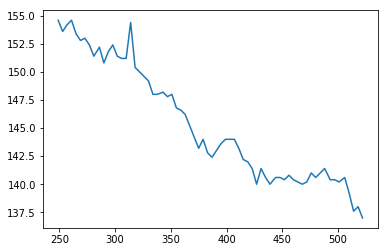

In [8]:
dfWeight['Value'].plot()

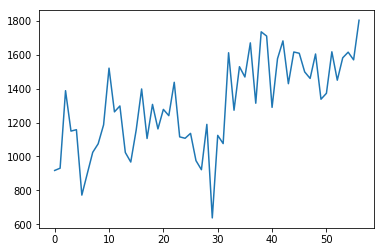

In [9]:
dataByDay['Calories, cals'].plot()
#dataByDay.plot()

<Figure size 432x288 with 0 Axes>

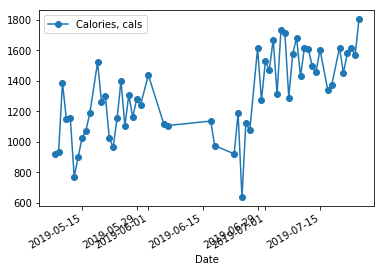

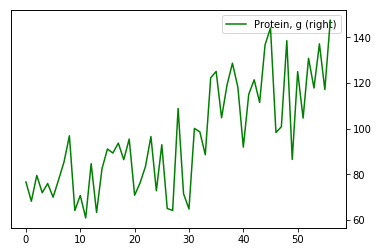

In [10]:
plt.figure();
dataByDay.plot(x='Date', y = 'Calories, cals', marker='o')
dataByDay.plot(y = 'Protein, g',secondary_y=True, style='g')

In [ ]:
dataByDay['Calories, cals'].plot()
dataByDay['Protein, g'].plot(secondary_y=True, style='g')


In [ ]:
ax = dfWeight['Value'].plot()
dataByDay['Calories, cals'].plot(ax=ax)

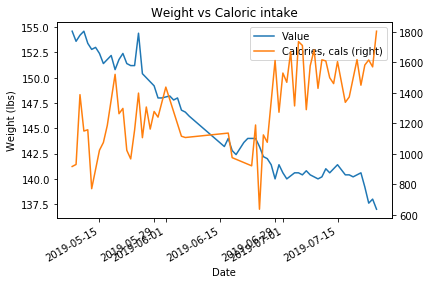

In [11]:
fig, ax = plt.subplots()
plt.title('Weight vs Caloric intake')
plt.xlabel('Date')
plt.ylabel('Weight (lbs)')
dfWeight.plot(x="Date", y=["Value"], ax=ax)
dataByDay.plot(x="Date", y=["Calories, cals"], ax=ax, secondary_y=True)